## Multi-Threading
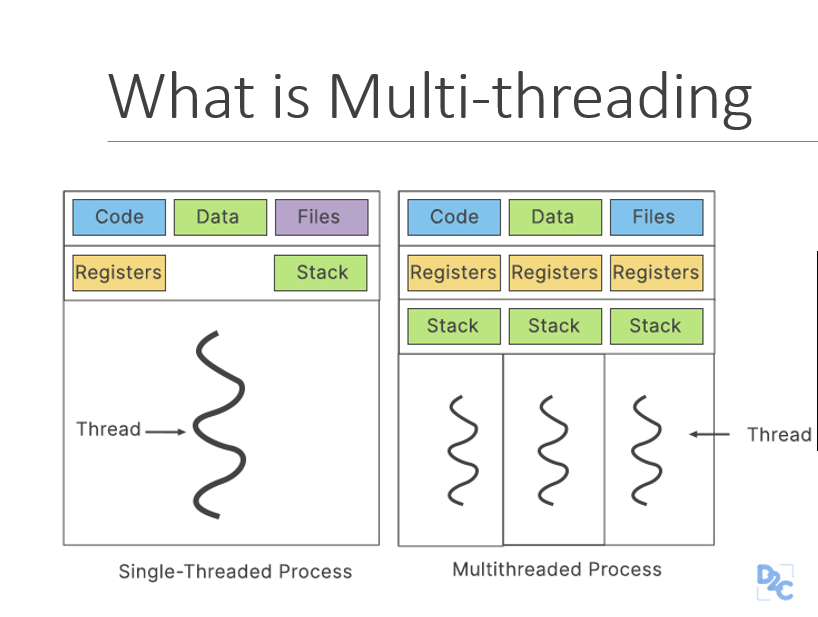

In [2]:
import time

In [3]:
def cube_data(num):
    """
    To generate cube of a number 
    """
    # Introducing delay in time(around 5s) with time.sleep(number of seconds)
    time.sleep(5)
    print(f"cube of a number {num} is {num**3}")
    return num**3

In [4]:
cb_d =  cube_data(4)
cb_d


cube of a number 4 is 64


64

In [5]:
principal = 45000
rate = 12
num = 10

In [6]:
def simple_interest(p,n,r):
    # Introducing delay in time(around 3s) with time.sleep(number of seconds)
    time.sleep(3)
    print(f"Simple interest is {(p*n*r)/100}")
    return (p*n*r)/100

In [10]:
%%time
si1 = simple_interest(principal,rate,num)
si1

Simple interest is 54000.0
CPU times: total: 0 ns
Wall time: 3 s


54000.0

In [11]:
%%time
from threading import Thread
th1 = Thread(target=cube_data,args=(5,))
th2 = Thread(target=simple_interest,args=(54000,12.5,8,))

th1.start()
th2.start()

th1.join()
th2.join()

Simple interest is 54000.0
cube of a number 5 is 125
CPU times: total: 0 ns
Wall time: 5 s


## Threads dont store outputs. We will have to store the results in a dictionary and print them 

In [24]:
def factorial(num,results,key):
    time.sleep(3)
    p = 1
    for i in range(1,num+1):
        p = p*i
    results[key] = p

In [14]:
d1 = 'raman'

In [15]:
d1[0]

'r'

In [16]:
d1[::-1]

'namar'

In [17]:
d1 == d1[::-1]

False

In [25]:
def palindrome(string,results,key):
    time.sleep(4)
    if string == string[::-1]:
        results[key] = "PALINDROME"
    else:
        results[key] = "NOT A PALINDROME"

In [19]:
f1 = factorial(5)
f1

120

In [22]:
%%time
p1 = palindrome("madam")
p1

CPU times: total: 0 ns
Wall time: 4 s


'PALINDROME'

In [21]:
p2 = palindrome("raman")
p2

'NOT A PALINDROME'

In [ ]:
factorial()

In [29]:
%%time
results = {}
th3 = Thread(target=factorial,args=(10,results,"factorial",))
th4 = Thread(target=palindrome,args=("racecar",results,"palindrome"))

th3.start()
th4.start()

th3.join()
th4.join()

#print(results)
print(f"Factorial results are : {results["factorial"]},palindrome results are: {results["palindrome"]}")

Factorial results are : 3628800,palindrome results are: PALINDROME
CPU times: total: 0 ns
Wall time: 4 s


In [30]:
urls = [
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv",
"https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv",
"https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv"
]

In [38]:
for url in urls:
    # a = url.split('/')
    # print(a)
    # print(a[-1])
    print(url.split('/')[-1])

data.csv
test.csv
train.csv


In [ ]:
u1 = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv"


In [32]:
from urllib.request import urlretrieve

In [39]:
def download_data(url_link):
    # Extract filename from url links
    file_name = url_link.split('/')[-1]

    # print downloading status to user
    print(f"{file_name} is downloading ...")

    # retrieve content from the url and copy that to filename provided
    urlretrieve(url_link,filename=file_name)

     # print downloading status to user
    print(f"{file_name} got downloaded")

In [40]:
for url in urls:
    download_data(url)

data.csv is downloading ...
data.csv got downloaded
test.csv is downloading ...
test.csv got downloaded
train.csv is downloading ...
train.csv got downloaded


In [42]:
%%time
Threads = []
for url in urls:
    thread = Thread(target=download_data,args=(url,))
    thread.start()

    Threads.append(thread)

for th in Threads:
    th.join()

data.csv is downloading ...
test.csv is downloading ...
train.csv is downloading ...
test.csv got downloaded
data.csv got downloaded
train.csv got downloaded
CPU times: total: 31.2 ms
Wall time: 5.76 s
